<a href="https://colab.research.google.com/github/lucascavalcante87/personal_studies/blob/main/approximate_pi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classic Problem
Approximate a value of pi with probability: 
- quarter circle with radius 1
- square of side 1

Generate a random point (x,y) in (0,1)x(0,1):
- points inside the quarter circle of radius 1
- points outside the square of side 1

Calculus
- Circle's Area = pi*radius²
    - radius = 1 implies Circle's Area = pi
- Total Points = \[ Inside Points \] + \[ Outside Points \]
- P(Inside Points) = 4 * \[ Inside Points \] / \[ Total Points \]

In [2]:
# Frameworks
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Approximate Value of Pì
def approximate_value_of_pi(times:int):
    inside_x, inside_y = [], []
    outside_x, outside_y = [], []
    for i in range(times):
        x = np.random.rand(1)
        y = np.random.rand(1)
        xy_dist = ((x**2)+(y**2))**(1/2)
        if xy_dist<=1:
            inside_x.append(x)
            inside_y.append(y)
        elif xy_dist>1:
            outside_x.append(x)
            outside_y.append(y)
        else:
            print("error")

    # Calculus
    inside = len(inside_x)
    outside = len(outside_x)
    total = inside + outside
    prox_circle_area = 4*inside/total

    # Graph of 1/4 of Circle
    plt.scatter(x=inside_x, y=inside_y, color="blue")
    plt.scatter(x=outside_x, y=outside_y, color="red")
    plt.title("Circle's Area")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(linestyle="--",alpha=0.5,color="gray")
    plt.show()

    # Result
    print("\u03c0 ~ {}".format(prox_circle_area))

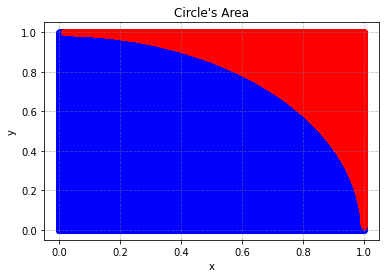

π ~ 3.141612
CPU times: user 17.1 s, sys: 629 ms, total: 17.7 s
Wall time: 17.7 s


In [19]:
%%time
approximate_value_of_pi(1000000)

In [14]:
# Approximate Value of Pì, a Faster Way with Numpy
def approximate_pi(times:int):
    x = np.random.rand(1,times)
    y = np.random.rand(1,times)

    # Circle's Points: Inside
    inside_x = np.where(((x**2)+(y**2))**(1/2) <= 1, x, np.nan)
    inside_y = np.where(((x**2)+(y**2))**(1/2) <= 1, y, np.nan)

    # Circles's Points: Outside
    outside_x = np.where(((x**2)+(y**2))**(1/2) > 1, x, np.nan)
    outside_y = np.where(((x**2)+(y**2))**(1/2) > 1, y, np.nan)

    # Remove NaNs
    inside_x = inside_x[~np.isnan(inside_x)]
    inside_y = inside_y[~np.isnan(inside_y)]
    outside_x = outside_x[~np.isnan(outside_x)]
    outside_y = outside_y[~np.isnan(outside_y)]

    # Calculus
    inside = len(inside_x) # quantity of inside points
    outside = len(outside_x) # quantity of outside points
    total = inside + outside  # total of points
    prox_circle_area = 4*inside/total # approximate value of pi

    # Graph: Quarter Circle
    plt.scatter(x=inside_x, y=inside_y, color="blue")
    plt.scatter(x=outside_x, y=outside_y, color="red")
    plt.title("Circle's Area")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(linestyle="--",alpha=0.5,color="gray")
    plt.show()

    # Result
    print("\u03c0 ~ {}".format(prox_circle_area))

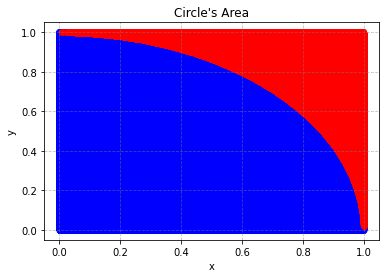

π ~ 3.142856
CPU times: user 2.15 s, sys: 17.5 ms, total: 2.17 s
Wall time: 2.17 s


In [15]:
%%time
approximate_pi(1000000)